In [1]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression

# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file names
dataset_file     = './birthweight_low.xlsx'
performance_file = './__model_results/linear_model_performance.xlsx'
prediction_file  = './__model_results/linear_model_predictions.xlsx'


# reading the files into Python
birthweight    = pd.read_excel(dataset_file)
performance = pd.read_excel(performance_file)
predictions = pd.read_excel(prediction_file)

In [31]:
birthweight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [32]:
birthweight.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.000000,193.000000,196.000000,193.000000,196.000000,189.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,40.153061,13.911917,2.341837,11.601036,39.290816,13.846561,8.193878,8.964286,10.928571,5.397959,0.551020,0.270408,0.382653,0.346939,0.346939,0.341837,0.311224,3334.086735
std,10.250055,2.055864,1.355136,4.267293,8.982725,2.634217,1.576482,0.651428,6.101282,3.001674,0.498664,0.445308,0.487279,0.477215,0.477215,0.475540,0.464180,646.700904
min,23.000000,8.000000,1.000000,2.000000,23.000000,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,697.000000
25%,33.000000,12.000000,2.000000,10.000000,34.750000,12.000000,8.000000,9.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2916.250000
50%,39.000000,14.000000,2.000000,12.000000,38.000000,14.000000,9.000000,9.000000,11.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3452.000000
75%,46.000000,16.000000,3.000000,12.000000,43.000000,16.000000,9.000000,9.000000,15.250000,7.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3759.500000
max,71.000000,17.000000,8.000000,35.000000,73.000000,17.000000,10.000000,10.000000,25.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4933.000000


In [33]:

birthweight.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [34]:
# imputing everything else with the median

# Total_Bsmt_SF
fill = 0
birthweight['meduc'] = birthweight['meduc'].fillna(fill)


# Garage_Cars
fill = 0
birthweight['npvis'] = birthweight['npvis'].fillna(fill)


# Garage_Area
fill = 0
birthweight['feduc'] = birthweight['feduc'].fillna(fill)




In [35]:
#checking missing values
birthweight.isnull().sum()

mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [36]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """  mage ~ bwght""",
                        data = birthweight)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   mage   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     53.17
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           7.57e-12
Time:                        21:30:31   Log-Likelihood:                -710.02
No. Observations:                 196   AIC:                             1424.
Df Residuals:                     194   BIC:                             1431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.6629      3.424     18.888      0.0

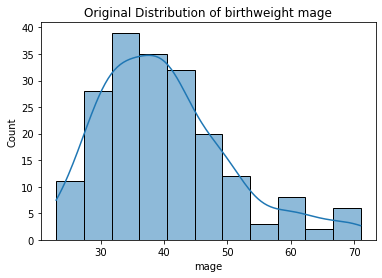

In [37]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'mage',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of birthweight mage")
plt.xlabel(xlabel = "mage") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()


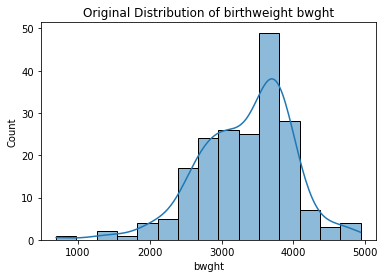

In [38]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of birthweight bwght")
plt.xlabel(xlabel = "bwght") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [39]:
# log transforming Sale_Price and saving it to the dataset
birthweight['log_mage'] = np.log(birthweight['mage'])
birthweight['log_bwght'] = np.log(birthweight['bwght'])

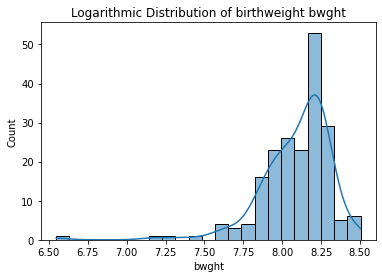

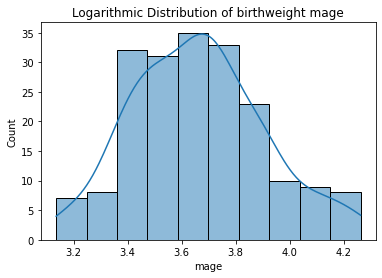

In [40]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of birthweight bwght")
plt.xlabel(xlabel = "bwght") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
             x      = 'log_mage',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of birthweight mage")
plt.xlabel(xlabel = "mage") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [41]:
# preparing explanatory variable data
birthweight_data   =  birthweight.drop(['mage',
                                   'log_mage',
                                   'bwght',
                                   'log_bwght',],
                                axis = 1)


# preparing response variable data
birthweight_target = birthweight.loc[ : , 'bwght']
log_birthweight_target = birthweight.loc[ : , 'log_bwght'] # ready for use later


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape[0]}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape[0]}
""")


Training Data
-------------
X-side: (147, 16)
y-side: 147


Testing Data
------------
X-side: (49, 16)
y-side: 49



In [42]:
# declaring set of x-variables
x_variables = ['meduc','monpre','npvis','fage','feduc','omaps','fmaps',
               'cigs','drink','male','mwhte','mblck','moth','fwhte','fblck','foth']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +


In [43]:
# merging X_train and y_train so that they can be used in statsmodels
birthweight_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """meduc ~ bwght +
                                            meduc +
                                            monpre +
                                            npvis +
                                            fage +
                                            feduc +
                                            omaps +
                                            fmaps +
                                            cigs +
                                            drink +
                                            male +
                                            mwhte +
                                            mblck +
                                            moth +
                                            fwhte +
                                            fblck +
                                            foth""",
                                             data = birthweight_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  meduc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.916e+29
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:30:37   Log-Likelihood:                 4434.4
No. Observations:                 147   AIC:                            -8837.
Df Residuals:                     131   BIC:                            -8789.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.553e-15      2e-14     -0.178      0.8

In [44]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = birthweight.loc[ : , x_variables]


# Preparing the target variable
birthweight_target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [15]:
# looping to detect features with missing values
for col in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthweight[    ['m_meduc', 'm_npvis', 'm_feduc', ]    ].sum(axis = 0)

m_meduc    3
m_npvis    3
m_feduc    7
dtype: int64

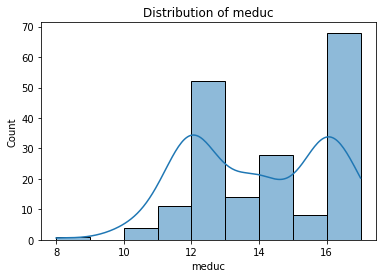

In [16]:
# creating a dropped dataset to visualize 'Mas Vnr Area'
df_dropped = birthweight.dropna()


# displaying the plot for 'Mas Vnr Area'
sns.histplot(x = 'meduc',
            data = df_dropped,
            kde = True)


# title and labels
plt.title('Distribution of meduc')


# displaying the plot
plt.show()

In [19]:
# making sure all missing values have been taken care of
birthweight.isnull().any().any()

False

In [45]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = birthweight.loc[ : , x_variables]


# Preparing the target variable
birthweight_target = birthweight.loc[ : , 'mage']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [46]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.4554
OLS Testing Score  : 0.2603
OLS Train-Test Gap : 0.1951


In [47]:
import sklearn.linear_model # linear models

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha= 5,  
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.0
Lasso Testing Score  : -0.0592
Lasso Train-Test Gap : 0.0592


In [48]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.4187
Testing Score : 0.298
ARD Train-Test Gap : 0.1207


In [50]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(x_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(x_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(x_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(x_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

KNN Training Score: 1.0
KNN Testing Score : 0.2226
KNN Train-Test Gap: 0.7774


In [67]:
#results
print(f"""
Model              Train Score      Test Score     Train-Test Gap
-----               -----------      ----------     ----------
OLS                  {lr_train_score}            {lr_test_score}       {lr_test_gap}
Lasso                {lasso_train_score}              {lasso_test_score}       {lasso_test_gap}
ARD                  {ard_train_score}            {ard_test_score}        {ard_test_gap}
KNN                  {knn_reg_score_train}               {knn_reg_score_test}       {knn_reg_test_gap}
Lasso is the choosen model
""")



Model              Train Score      Test Score     Train-Test Gap
-----               -----------      ----------     ----------
OLS                  0.4554            0.2603       0.1951
Lasso                0.0              -0.0592       0.0592
ARD                  0.4187            0.298        0.1207
KNN                  1.0               0.2226       0.7774
Lasso is the choosen model

